In [202]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
test_data=pd.read_csv('Titanic_test.csv')#loading dataset

In [204]:
test_data.shape#shape of the data

(418, 11)

In [205]:
test_data.head()#first 5 rows of data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
test_data.describe()#summary statistics

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


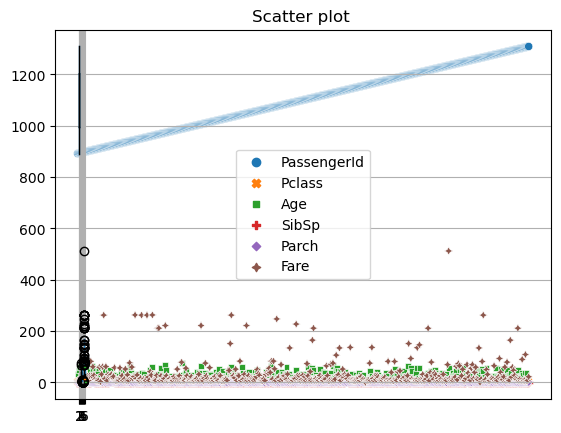

In [208]:
sns.scatterplot(data=test_data)#scatterplot of dataset
plt.title('Scatter plot ')
plt.show()

In [209]:
#replacing null values and deleting the columns(which have lot of null values)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

In [210]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [211]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Listing categorical columns to encode using LabelEncoder
categorical_cols = ['Sex','Fare','Embarked']  # Choosing categorical columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    test_data[col] = le.fit_transform(test_data[col])
    
    
test_data.drop(columns=['Name','Ticket','Parch','Name'], inplace=True)

In [212]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Fare         418 non-null    int64  
 6   Embarked     418 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 19.7 KB


In [213]:
def cap_upper_outliers(test_data, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = test_data[column].quantile(0.25)
    Q3 =test_data[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    test_data[column] = test_data[column].apply(lambda x: min(x, upper_bound))
    test_data[column] = test_data[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return test_data

# List of numerical columns to cap outliers
columns_to_cap = ['Age', 'SibSp' ,'Fare']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    test_data = cap_upper_outliers(test_data, col)

In [214]:
test_data.boxplot()#checking for outliers

<Axes: >

In [215]:
test_data.head()#changed into numerical values

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,1,34.500,0.0,24,1
1,893,3,0,47.000,1.0,5,2
2,894,2,1,54.875,0.0,41,1
3,895,3,1,27.000,0.0,34,2
4,896,3,0,22.000,1.0,46,2


In [218]:
# Feature-target split
from sklearn.model_selection import train_test_split

X = test_data.drop('Embarked', axis=1)  # Replace 'target_column' with the name of your target column
y = test_data['Embarked']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
print("Shape of X:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X: (334, 6)
Shape of y_train: (334,)


In [228]:
from sklearn.linear_model import LogisticRegression
log_reg1=LogisticRegression(max_iter=1000)
log_reg1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [229]:
y_pred=log_reg1.predict(X_train)

In [230]:
y_pred_df = pd.DataFrame({'y_train': y_train.values,  # Use .values to avoid index issues
                          'Yhat': y_pred})

In [231]:
#model evaluation

In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Making predictions
y_pred = log_reg1.predict(X_test)

# Calculating accuracy, precision, recall, F1 score (weighted for multiclass)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculating ROC AUC score for multiclass
roc_auc = roc_auc_score(y_test, log_reg1.predict_proba(X_test), multi_class='ovr', average='weighted')

# Printing results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.7023809523809523
Precision: 0.6774774774774774
Recall: 0.7023809523809523
F1 Score: 0.6446886446886447
ROC AUC Score: 0.6893041756176155


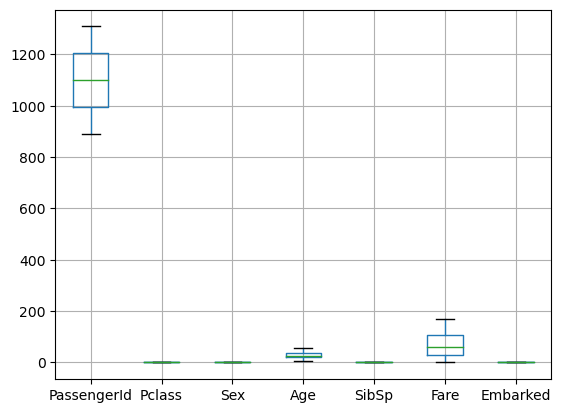

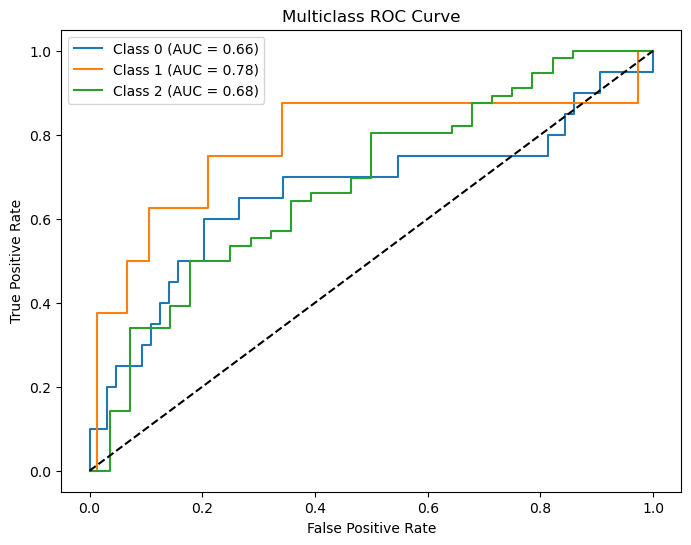

In [236]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  predicted probabilities for each class
y_prob = log_reg1.predict_proba(X_test)

# Number of classes
n_classes = len(log_reg1.classes_)

# Creating a plot for each class's ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test == i, y_prob[:, i])  # One-vs-rest
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='best')
plt.show()


In [226]:
# feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg1.coef_[0]     
})
print(feature_importance)

       Feature  Coefficient
0  PassengerId     0.000013
1       Pclass    -0.374002
2          Sex     0.465518
3          Age    -0.011123
4        SibSp    -0.018591
5         Fare     0.014567


In [ ]:
#Significant Features: Pclass, Sex, and Fare are the most significant features in predicting survival. This aligns with historical facts, where first-class passengers, women, and those who paid more for their ticket were more likely to survive.
#Moderately Significant Features:Age,SibSp and Age have moderate to weak influence, reflecting that passengers traveling with many family members or older passengers may have had slightly lower survival rates, but these factors are less influential than class or fare.

In [ ]:
#Interview Questions:

#Precision vs. Recall:

#Precision:

#Precision measures how many of the instances predicted as positive are actually positive.
#It focuses on the accuracy of the positive predictions made by the model.
#Precision is important when false positives are costly. 
#For example, in a spam filter, you want to minimize the number of legitimate emails classified as spam.

#Recall:

#Recall (or sensitivity) measures how many of the actual positive instances were correctly predicted by the model.
#It focuses on the ability of the model to identify all positive instances.
#Recall is important when false negatives are costly. For example, in medical diagnostics, missing an actual disease case (false negative) can have serious consequences.

#Key Difference:

#Precision focuses on the accuracy of positive predictions, while recall focuses on how well the model captures all positive instances.



#Cross-validation and importance in binary classification:

#Cross-validation is a technique used to assess the performance of a model by training and testing it on different subsets of data. The most common type is k-fold cross-validation.

#In k-fold cross-validation:

#The dataset is divided into k equally sized folds (subsets).
#The model is trained on k-1 folds and tested on the remaining fold.
#This process is repeated k times, with each fold used exactly once as the test set.
#The overall performance is the average performance across all k iterations.
#Why is it important in binary classification?

#Prevents overfitting: Cross-validation helps ensure that the model is not simply memorizing the training data but generalizes well to unseen data.
#Reduces variance: Instead of relying on a single train-test split, cross-validation provides a more robust evaluation of model performance, reducing the variability caused by how the data is split.
#More reliable metric: It provides a better estimate of how the model will perform in the real world by evaluating it on multiple different subsets of the data.

